In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df= pd.read_excel(r"C:\Users\abhir\OneDrive\Desktop\Rajupalem\Rajupalem Land Records.xlsx")

# Initial inspection

In [3]:
print("Data ahape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Data ahape: (1620, 10)

First 5 rows:


,Sl. No.,Account No.,Land owner name,Land Parcel Number,Land nature,Land classification,Land sub-classification,Land Extent (in acres),Aadhar last four digits,Remarks
0,1,1.0,Abbayi Reddy Kunkala,269.0,Patta Jirayathi Bhoomi,Maagani,LLA,3.91,NaN,NaN
1,2,1.0,Abbayi Reddy Kunkala,298.0,Patta Jirayathi Bhoomi,Metta,Pattadaar,1.00,NaN,NaN
2,3,1.0,Abbayi Reddy Kunkala,303.0,Patta Jirayathi Bhoomi,Metta,Pattadaar,0.16,NaN,NaN
3,4,1.0,Abbayi Reddy Kunkala,377.0,Patta Jirayathi Bhoomi,Metta,Pattadaar,2.43,NaN,NaN
4,5,1.0,Abbayi Reddy Kunkala,383.0,Patta Jirayathi Bhoomi,Metta,Pattadaar,0.10,NaN,NaN



Data types:
Sl. No.                      int64
Account No.                float64
Land owner name             object
Land Parcel Number         float64
Land nature                 object
Land classification         object
Land sub-classification     object
Land Extent (in acres)     float64
Aadhar last four digits    float64
Remarks                    float64
dtype: object

Missing values:
Sl. No.                       0
Account No.                 795
Land owner name             795
Land Parcel Number          795
Land nature                 795
Land classification         795
Land sub-classification     795
Land Extent (in acres)      795
Aadhar last four digits    1620
Remarks                    1620
dtype: int64


# Data Cleaning

In [4]:
df.drop(['Aadhar last four digits', 'Remarks'], axis=1, inplace=True)

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Sl. No.                    0
Account No.                0
Land owner name            0
Land Parcel Number         0
Land nature                0
Land classification        0
Land sub-classification    0
Land Extent (in acres)     0
dtype: int64

In [14]:
# Data shape after data cleaning
print("Data Shape:", df.shape)

Data Shape: (825, 8)


In [7]:
# same land is shared bewteen few people. so I am tacking max land bwteeen them

total_land = df.groupby('Land Parcel Number')['Land Extent (in acres)'].max().sum(skipna=True)
print("Actual Total land:",total_land)

Actual Total land: 779.7743


# Visualization

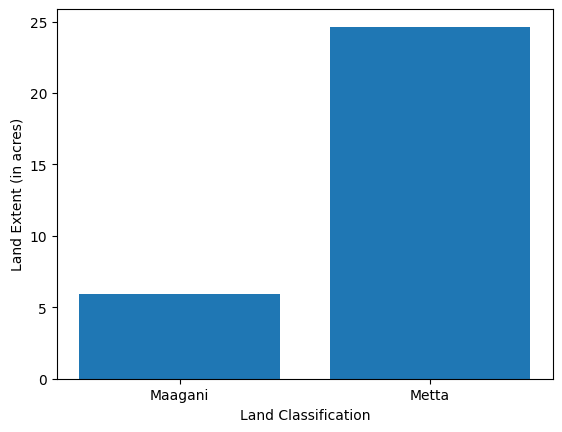

In [16]:
plt.bar(df['Land classification'], df['Land Extent (in acres)'])
plt.xlabel("Land Classification")
plt.ylabel("Land Extent (in acres)")
plt.show()

In [29]:
Grouped_data= df.groupby(['Land nature']).agg({'Land Extent (in acres)': 'sum'}).reset_index()
print(Grouped_data)

              Land nature  Land Extent (in acres)
0              Govt. Land                366.9100
1  Patta Jirayathi Bhoomi                695.4037


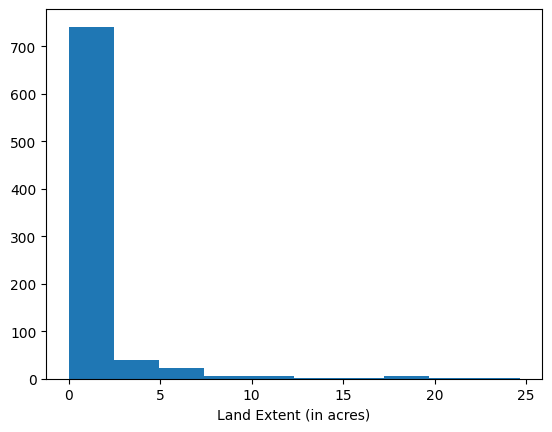

In [13]:
plt.hist(df['Land Extent (in acres)'])
plt.xlabel("Land Extent (in acres)")
plt.show()

In [27]:
print(Grouped_data.columns.tolist())

['Land classification', 'Land nature', 'Land Extent (in acres)']


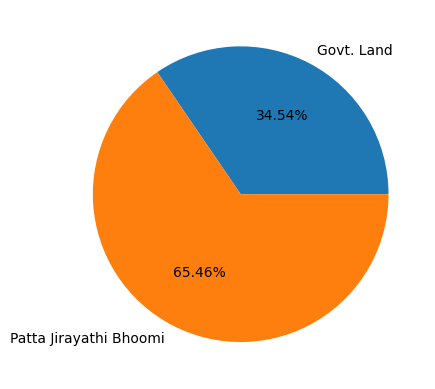

In [31]:
plt.pie(Grouped_data['Land Extent (in acres)'], labels= Grouped_data['Land nature'], 
        autopct="%.2f%%")
plt.show()